In [1]:
import pandas as pd
df = pd.read_csv("../data/raw/repositories_raw.csv")
df.head()

,repo_id,full_name,language,stars,forks,watchers,open_issues,is_archived,created_at,updated_at,pushed_at,repo_age_days,days_since_last_push,description,has_description
0,54346799,public-apis/public-apis,Python,388437,41485,388437,770,False,2016-03-20T23:49:42+00:00,2025-12-29T17:13:09+00:00,2025-11-04T18:29:01+00:00,3570,54,A collective list of free APIs,True
1,13491895,EbookFoundation/free-programming-books,Python,379529,65666,379529,198,False,2013-10-11T06:50:37+00:00,2025-12-29T16:50:45+00:00,2025-12-16T14:12:26+00:00,4462,13,:books: Freely available programming books,True
2,83222441,donnemartin/system-design-primer,Python,330674,53826,330674,521,False,2017-02-26T16:15:28+00:00,2025-12-29T17:12:07+00:00,2025-11-03T12:06:22+00:00,3228,56,Learn how to design large-scale systems. Prep ...,True
3,21289110,vinta/awesome-python,Python,275890,26971,275890,532,False,2014-06-27T21:00:06+00:00,2025-12-29T17:12:04+00:00,2025-11-20T09:45:51+00:00,4202,39,An opinionated list of awesome Python framewor...,True
4,63476337,TheAlgorithms/Python,Python,216069,49791,216069,822,False,2016-07-16T09:44:01+00:00,2025-12-29T17:12:06+00:00,2025-12-13T01:15:31+00:00,3453,16,All Algorithms implemented in Python,True


In [2]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   repo_id               30 non-null     int64 
 1   full_name             30 non-null     object
 2   language              27 non-null     object
 3   stars                 30 non-null     int64 
 4   forks                 30 non-null     int64 
 5   watchers              30 non-null     int64 
 6   open_issues           30 non-null     int64 
 7   is_archived           30 non-null     bool  
 8   created_at            30 non-null     object
 9   updated_at            30 non-null     object
 10  pushed_at             30 non-null     object
 11  repo_age_days         30 non-null     int64 
 12  days_since_last_push  30 non-null     int64 
 13  description           30 non-null     object
 14  has_description       30 non-null     bool  
dtypes: bool(2), int64(7), object(6)
memory usa

In [3]:
df["temp_at_risk"]=(
    (df["is_archived"]==True) |
    (df["days_since_last_push"]>365) ).astype(int)

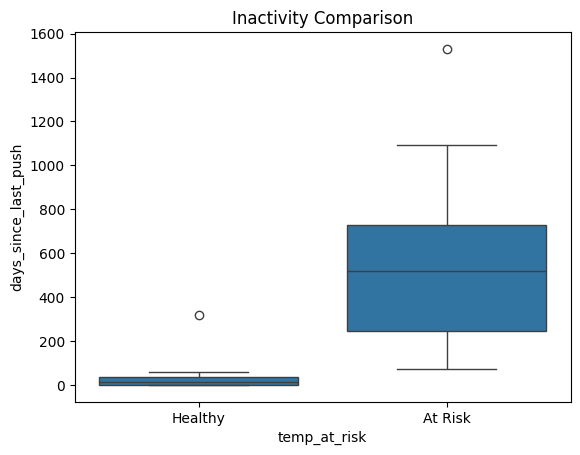

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(
    x="temp_at_risk",
    y="days_since_last_push",
    data=df
)
plt.xticks([0,1], ["Healthy", "At Risk"])
plt.title("Inactivity Comparison")
plt.show()


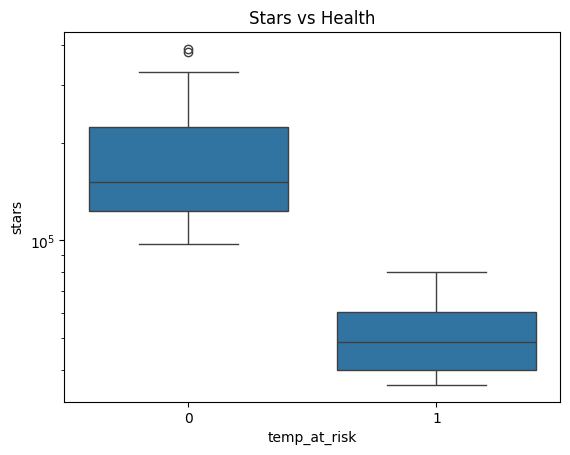

In [5]:
sns.boxplot(
    x="temp_at_risk",
    y="stars",
    data=df
)
plt.yscale("log")
plt.title("Stars vs Health")
plt.show()


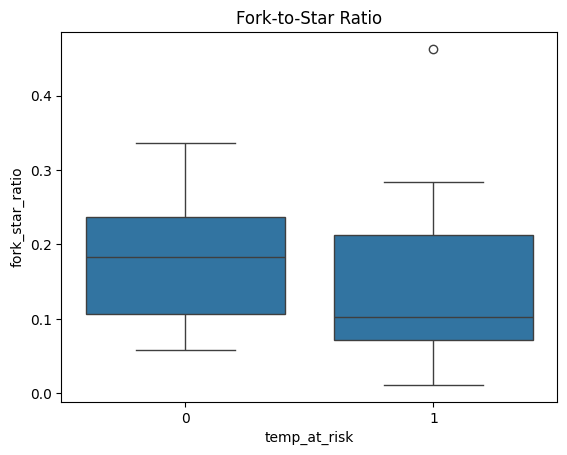

In [6]:
df["fork_star_ratio"] = df["forks"] / (df["stars"] + 1)

sns.boxplot(
    x="temp_at_risk",
    y="fork_star_ratio",
    data=df
)
plt.title("Fork-to-Star Ratio")
plt.show()


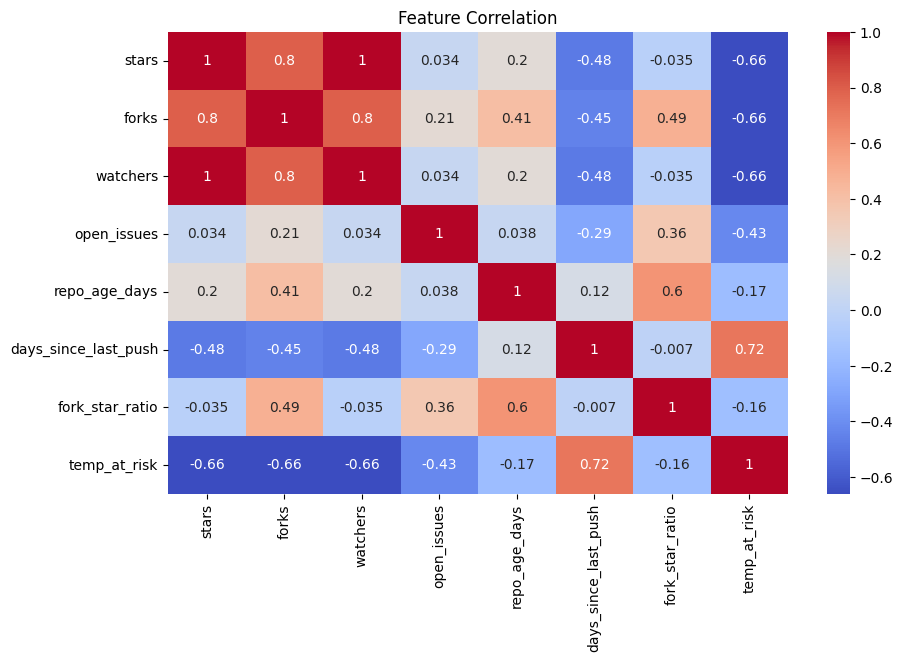

In [7]:
numeric_cols = [
    "stars",
    "forks",
    "watchers",
    "open_issues",
    "repo_age_days",
    "days_since_last_push",
    "fork_star_ratio"
]

corr = df[numeric_cols + ["temp_at_risk"]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()


In [9]:
issue_pressure = df["open_issues"] / (df["repo_age_days"] + 1)

df["at_risk"] = (
    (df["is_archived"]) |
    (df["days_since_last_push"] >= 365) |
    (
        (df["days_since_last_push"] >= 180) &
        (issue_pressure > 0.1)
    )
).astype(int)



In [ ]:
print("At-risk repository counts:")
df["at_risk"].value_counts()
print("Proportion of at-risk repositories:")
df["at_risk"].mean()


Proportion of at-risk repositories:


np.float64(0.36666666666666664)